In [237]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [238]:
landmarks = np.array([    
    [210.1, 207.2],
    [299.1, 207.3],
    [249.7, 264.41],
    [218.22, 310.11],
    [290.22, 311.01]], dtype = np.float32)

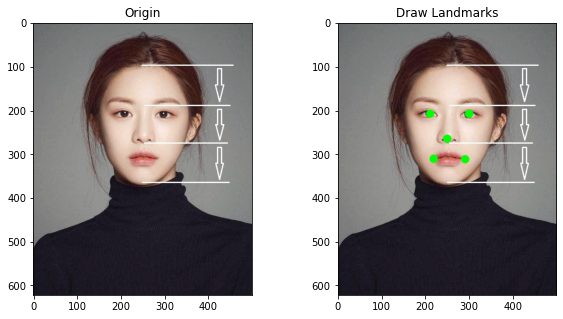

In [239]:
nterface = cv2.imread("face.png")
face_show = face.copy()
for x, y in landmarks:
    cv2.circle(face_show, (int(x), int(y)), 9, (0, 255, 0), -1, 16)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Origin")
plt.imshow(face[..., ::-1])

plt.subplot(1, 2, 2)
plt.title("Draw Landmarks")
plt.imshow(face_show[..., ::-1]) # 是对最内层的列表进行逆序取值：

In [240]:
x2 = np.array([[4, 4],
             [4, 4],
             [4, 4],
             [4, 4],
             [4, 4]],dtype = np.float32)

x1 = (np.divide(landmarks,x2))
x1

array([[52.525 , 51.8   ],
       [74.775 , 51.825 ],
       [62.425 , 66.1025],
       [54.555 , 77.5275],
       [72.555 , 77.7525]], dtype=float32)

# 标准人脸的landmaorks可以手动给出，也可以通过数据集求平均得到

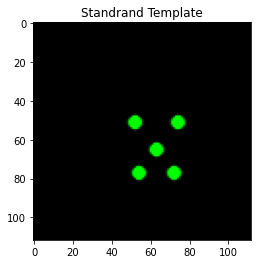

In [241]:
std_landmarks = np.array([
       [52.525 , 51.8   ],
       [74.775 , 51.825 ],
       [63.425 , 65.1025],
       [54.555 , 77.5275],
       [72.555 , 77.7525]
],dtype=np.float32)

std_face = np.zeros((112, 112, 3), dtype=np.uint8)
for x, y in std_landmarks:
    cv2.circle(std_face, (int(x), int(y)), 3, (0, 255, 0), -1, 16)

plt.title("Standrand Template")
plt.imshow(std_face[..., ::-1])

# 6个自由度的矩阵定义

[[ 0.24942796  0.00041044  0.23827524]
 [ 0.00057204  0.24958956 -0.23827524]]


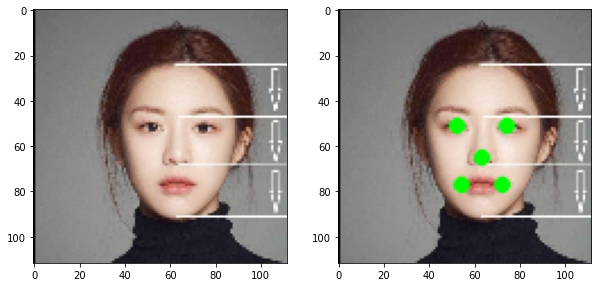

In [242]:
Q = np.ones((5, 3))
Q[:, :2] = landmarks
S = std_landmarks

M = np.linalg.inv(Q.T@ Q) @ Q.T @S

matrix = M.T
print(matrix)

affine1 = cv2.warpAffine(face, matrix, (112, 112))
affine1_show = affine1.copy()

for x, y in std_landmarks:
    cv2.circle(affine1_show, (int(x), int(y)), 3, (0, 255, 0), -1, 16)
               
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(affine1[..., ::-1])

plt.subplot(1, 2, 2)
plt.imshow(affine1_show[..., ::-1])

# 4个自由度的矩阵定义

[[ 2.49526754e-01  3.68310449e-05  3.10376377e-01]
 [-3.68310449e-05  2.49526754e-01 -6.76177593e-02]]


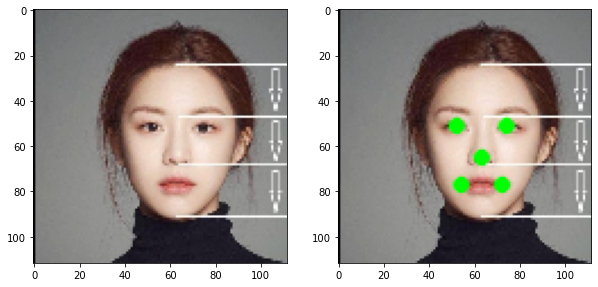

In [243]:

Q = np.zeros((10, 4))


S = std_landmarks.reshape(-1, 1)
for i in range(5):
    x, y = landmarks[i]
    Q[i*2 + 0] = x, y, 1, 0
    Q[i*2 + 1] = y, -x, 0, 1
阵的求解，奇异矩阵；
        2.最小二乘法 ， minimize的方向入手
M = (np.linalg.inv(Q.T @ Q) @ Q.T @ S).squeeze()


matrix = np.array([
    [M[0], M[1], M[2]],
    [-M[1], M[0], M[3]]
])
print(matrix)

affine2 = cv2.warpAffine(face, matrix, (112, 112))
affine2_show = affine2.copy()

for x, y in std_landmarks:
    cv2.circle(affine2_show, (int(x), int(y)), 3, (0, 255, 0), -1, 16)
    
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(affine2[..., ::-1])

plt.subplot(1, 2, 2)
plt.imshow(affine2_show[..., ::-1])

# 6自由度和4个自由度对比

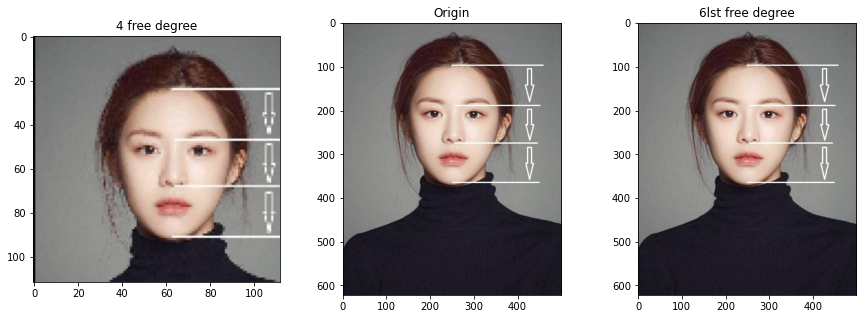

In [249]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.title("Origin")
plt.imshow(face[..., ::-1])


plt.subplot(1, 3, 1)
plt.title("4 free degree")
plt.imshow(affine2[..., ::-1])


plt.subplot(1, 3, 3)
plt.title("6lst free degree")
plt.imshow(face[..., ::-1])

### 这里有个坑，正脸的时候无法看到6个自由度在WarpAffine中发生的错切和不等比缩放

# 接下来以侧脸为标准让大家看看，WarpAffine中6个自由度和4个自由度区别
    -- 6个自由度发生形变， 即错切， 不等缩放
    -- 4个自由都没有发生改变

In [321]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [324]:
landmarks = np.array([    
    [160.1, 83.2],
    [301.2, 86.3],
    [189.7, 167.41],
    [171.22, 250.11],
    [265.22, 260.01]], dtype = np.float32)

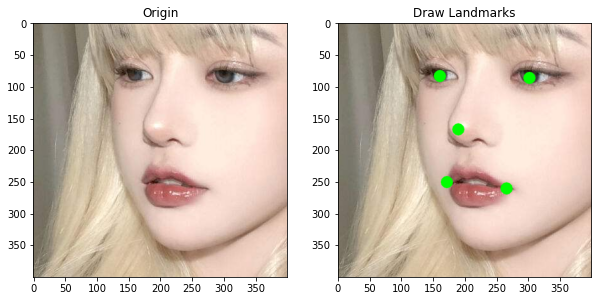

In [325]:
face = cv2.imread("side_face.png")
face_show = face.copy()
for x, y in landmarks:
    cv2.circle(face_show, (int(x), int(y)), 9, (0, 255, 0), -1, 16)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Origin")
plt.imshow(face[..., ::-1])

plt.subplot(1, 2, 2)
plt.title("Draw Landmarks")
plt.imshow(face_show[..., ::-1]) # 是对最内层的列表进行逆序取值：

In [326]:
x2 = np.array([[4, 4],
             [4, 4],
             [4, 4],
             [4, 4],
             [4, 4]],dtype = np.float32)

x1 = (np.divide(landmarks,x2))
x1

array([[40.025 , 20.8   ],
       [75.3   , 21.575 ],
       [47.425 , 41.8525],
       [42.805 , 62.5275],
       [66.305 , 65.0025]], dtype=float32)

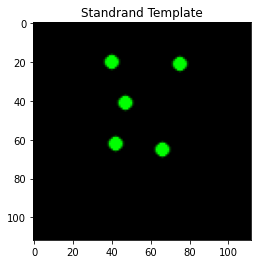

In [327]:
std_landmarks = np.array([[40.025 , 20.8],
       [75.3   , 21.575 ],
       [47.425 , 41.8525],
       [42.805 , 62.5275],
       [66.305 , 65.0025]], dtype=np.float32)

std_face = np.zeros((112, 112, 3), dtype=np.uint8)
for x, y in std_landmarks:
    cv2.circle(std_face, (int(x), int(y)), 3, (0, 255, 0), -1, 16)

plt.title("Standrand Template")
plt.imshow(std_face[..., ::-1])

# 标准人脸的landmaorks可以手动给出，也可以通过数据集求平均得到

# 6个自由度的矩阵定义

[[ 2.50000000e-01 -4.78645037e-16  2.46564454e-13]
 [ 3.69257661e-16  2.50000000e-01  6.79835420e-14]]


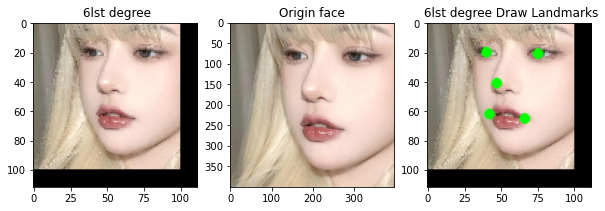

In [334]:
Q = np.ones((5, 3))
Q[:, :2] = landmarks
S = std_landmarks

M = np.linalg.inv(Q.T@ Q) @ Q.T @S

matrix = M.T
print(matrix)

affine1 = cv2.warpAffine(face, matrix, (112, 112))
affine1_show = affine1.copy()

for x, y in std_landmarks:
    cv2.circle(affine1_show, (int(x), int(y)), 3, (0, 255, 0), -1, 16)
               
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title(" 6lst degree")
plt.imshow(affine1[..., ::-1])

plt.subplot(1, 3, 3)
plt.title(" 6lst degree Draw Landmarks")
plt.imshow(affine1_show[..., ::-1])

plt.subplot(1, 3, 2)
plt.title("Origin face")
plt.imshow(face[..., ::-1]) # 是对最内层的列表进行逆序取值：

#####  对比原图我们发现6自由度进行了拉伸，请注意看（左侧脸部轮廓）

# 4个自由度的矩阵定义

[[ 2.50000000e-01 -1.31838984e-16  6.75015599e-14]
 [ 1.31838984e-16  2.50000000e-01 -7.10542736e-15]]


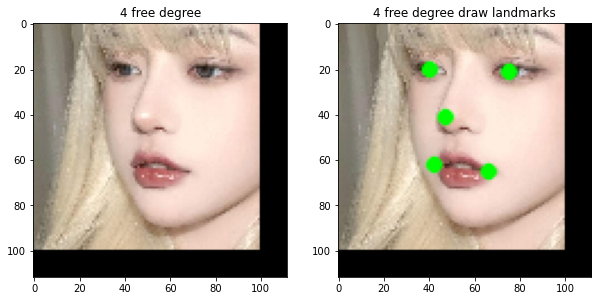

In [337]:
Q = np.zeros((10, 4))


S = std_landmarks.reshape(-1, 1)
for i in range(5):
    x, y = landmarks[i]
    Q[i*2 + 0] = x, y, 1, 0
    Q[i*2 + 1] = y, -x, 0, 1

M = (np.linalg.inv(Q.T @ Q) @ Q.T @ S).squeeze()


matrix = np.array([
    [M[0], M[1], M[2]],
    [-M[1], M[0], M[3]]
])
print(matrix)

affine2 = cv2.warpAffine(face, matrix, (112, 112))
affine2_show = affine2.copy()

for x, y in std_landmarks:
    cv2.circle(affine2_show, (int(x), int(y)), 3, (0, 255, 0), -1, 16)
    
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("4 free degree")
plt.imshow(affine2[..., ::-1])

plt.subplot(1, 2, 2)
plt.title("4 free degree draw landmarks")
plt.imshow(affine2_show[..., ::-1])

# 6 自由度和4个自由度的比较

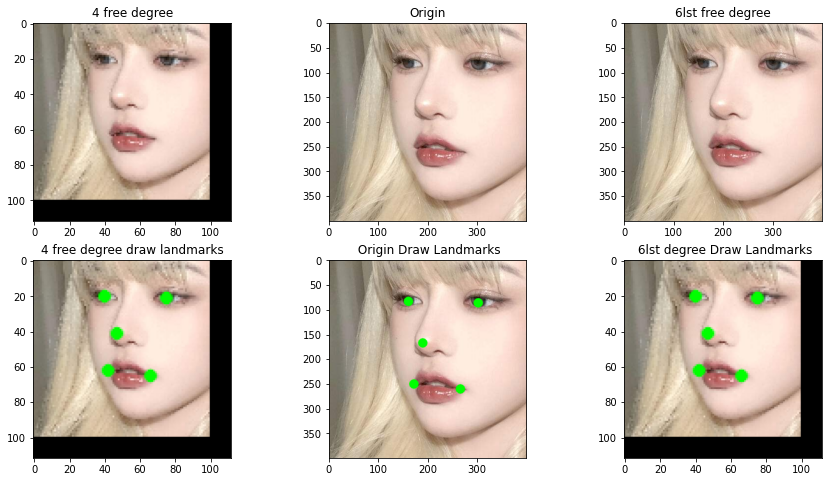

In [346]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 2)
plt.title("Origin")
plt.imshow(face[..., ::-1])


plt.subplot(2, 3, 1)
plt.title("4 free degree")
plt.imshow(affine2[..., ::-1])


plt.subplot(2, 3, 3)
plt.title("6lst free degree")
plt.imshow(face[..., ::-1])


plt.subplot(2, 3, 5)
plt.title(" Origin Draw Landmarks")
plt.imshow(face_show[..., ::-1]) # 是对最内层的列表进行逆序取值：


plt.subplot(2, 3, 4)
plt.title("4 free degree draw landmarks")
plt.imshow(affine2_show[..., ::-1])


plt.subplot(2, 3, 6)
plt.title(" 6lst degree Draw Landmarks")
plt.imshow(affine1_show[..., ::-1])


# 如国觉得对比不明显，可以直接缩放整个页面，就看得比较清楚了 【control + 鼠标滚轮】